In [1]:
#Paso 1 - Cargar las librerias necesarias para abrir un documento en excel y comenzar con la limpieza de datos.
import pandas as pd
import numpy as np

#Paso 2 - Abrir archivo de pokemon.csv 
df = pd.read_csv('datasets/pokemon.csv')

df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [2]:
# Eliminar columnas que no seran utilizadas dentro del análisis 
df.drop(['#','Type 2', 'Legendary', 'Name'],
        axis=1,
        inplace=True)
# Renombrar columnas que seran utilizadas dentro del análisis
df.rename(columns={'Type 1':'Type', 'Sp.Atk': 'ALL', 'Sp.Def': 'Spdef'},
          inplace=True)
# Cambiar etiquetas de columnas por strings
df.columns = list(map(str, df.columns))

#Establecer el nombre de los pokemones como indice
df.set_index('Generation', inplace=True)


df

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,,,
1,Grass,318,45,49,49,65,65,45
1,Grass,405,60,62,63,80,80,60
1,Grass,525,80,82,83,100,100,80
1,Grass,625,80,100,123,122,120,80
1,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
6,Rock,600,50,100,150,100,150,50
6,Rock,700,50,160,110,160,110,110
6,Psychic,600,80,110,60,150,130,70


In [3]:
df_generation = df.groupby('Generation',
                          axis = 0).sum()

print(type(df.groupby('Generation',
                     axis = 0
                     )))
df_generation


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,,
1,70851,10926,12722,11763,11922,11469,12049
2,44338,7548,7635,7779,6990,7834,6552
3,69796,10647,13060,11856,12129,11396,10708
4,55541,8843,10027,9454,9245,9340,8632
5,71773,11845,13541,11934,11878,11342,11233
6,35783,5598,6216,6288,6092,6141,5448


In [4]:
sum(df_generation['Total'])

348082

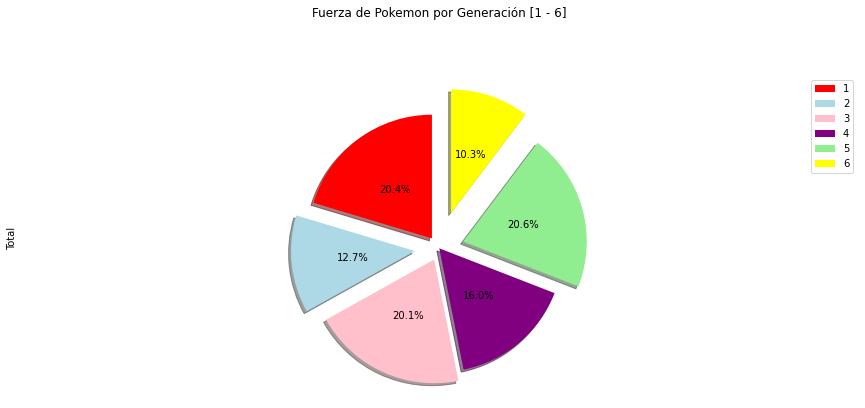

In [5]:
import matplotlib.pyplot as plt
colors_list = ['red', 'lightblue', 'pink', 'purple', 'lightgreen', 'yellow']
explode_list = [0.1, 0.2, 0.1, 0, 0.2, 0.3] # ratio for each continent with which to offset each wedge.

# autopct create %, start angle represent starting point
df_generation['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance= 0.5,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Fuerza de Pokemon por Generación [1 - 6]', y=1.16) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_generation.index, loc='upper right') 

plt.show()

In [6]:
df_generation.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')

In [7]:
import statsmodels.api as sm
model = sm.OLS.from_formula('Total~HP + Attack + Defense + Sp. Atk' + Sp. Def + Speed',  #peso = b0 + b1*cintura
                           data = df_generation)
result1 = model.fit()
result1.summary()

SyntaxError: EOL while scanning string literal (<ipython-input-7-e6be9d2c860d>, line 2)